# 2.3 Titanic: Machine Learning from Disaster

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [6]:
from IPython.display import HTML
style = "<style>svg{width:30% !important;height:30% !important;}</style>"
HTML(style)

Processing the data from the dataset.

In [8]:
titanic_data = pd.read_csv("/Users/yanavorobyova/Documents/Jypiter/train.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DataFrame description:

+ PassengerId - Passenger ID
+ Survived - Whether the passenger survived or not
+ Pclass - Ticket class
+ Name - Name
+ Sex - Gender
+ Age - Age
+ SibSp - Number of siblings/spouses aboard
+ Parch - Number of parents/children aboard
+ Ticket - Ticket number
+ Fare - Fare
+ Cabin - Cabin number
+ Embarked - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**Task: Train a decision tree to predict whether a passenger survived or not based on the passenger data from the train.csv dataset.**

When working with data, it makes sense to start with basic preprocessing. This helps understand the nature of the data we're dealing with.

At the very least, applying the `head()` method allows us to understand the types of data present in the dataset and visually inspect them. Additionally, it's useful to check how many missing values are in each column. Because if there are variables where 99% of the values are missing, it's likely best to discard them.

How to check for missing values in a DataFrame using pandas?

Firstly, in pandas, the DataFrame has the `isnull()` method, which returns False or True for each observation, depending on whether the observation is missing.

In [9]:
titanic_data.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


Visually, it's probably not very convenient to perceive the result of such a table. However, if you calculate the sum, the result can be more useful for analysis.

It will contain information about how many missing values are in each column.

In [10]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

As seen from the results above, a lot of data is missing regarding the passengers' ages and the cabin numbers they traveled in. Most likely, this is not a critical issue, and the cabin number variable is not of particular interest to us. It might only contain information about where exactly on the Titanic a particular cabin was located. For simplicity, let's exclude this variable from consideration.

This leads us to the question of which variables we will use for training.

I reiterate, at the moment, we don't want to dwell on data preprocessing. Firstly, we'll discuss this when working with other datasets.

Therefore, let's now select only the most obvious variables that we will use for training.

So, we'll remove the following columns from consideration:
+ PassengerId
+ Ticket number
+ Cabin number
+ Passenger name
+ Survived

We remove the passenger's name not because there's anything wrong with it, but because using the name to deduce any patterns seems impractical.

We remove 'Survived' not because there's anything wrong with it, but because it's precisely what we want to predict.

How can we do this?

1. Create a list of the features we want to keep, thus creating a new DataFrame with only the necessary columns.
2. Remove the unnecessary columns from the original dataset.

Let's do this using the second method. We'll use the `drop()` method, passing it a list of columns to be dropped. To ensure that the method understands that this list contains column names and not indexes of our DataFrame, we need to specify the argument `axis=1`.

In [11]:
X = titanic_data.drop(['PassengerId','Survived','Name', 'Ticket', 'Cabin'], axis=1)

Let's check that everything has been deleted.

In [12]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Let's create a variable `y`, which will contain the variable we want to predict.

In [13]:
y = titanic_data.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

## Step 5

We already know what to do next. We need a decision tree.

Let's create this classifier.

In [14]:
clf = tree.DecisionTreeClassifier()

And we train it on our data.

In [15]:
clf.fit(X,y)

ValueError: could not convert string to float: 'male'

We've encountered an error related to data transformation. It turns out that in the sklearn implementation of the decision tree, this algorithm can only work with numerical data. Even nominal variables must be encoded as numerical variables using 0, 1, or other numbers. Unfortunately, it cannot work with string identifiers.

So, we continue the data preprocessing process and get rid of variables recorded in string format. This is an interesting topic, and there are several ways to do it.

For example, the variable 'Survived' is also a nominal variable that could have been recorded as strings, but it's recorded as 0 and 1.

This method of encoding nominal variables into numerical ones is called label encoding - where we simply assign some gradation to a level. For example, male will be 0, and female will be 1.

This is an acceptable approach, especially when working with decision trees. Because now we will say if Sex > 0.5, then we are dealing with one gender, and in another situation - with another gender.

Or there is another method called one-hot encoding, where we split the 'Sex' variable into two variables - we will have the 'Sex male' variable and the 'Sex female' variable. They will take values of either 0 or 1 depending on what we get.

I'll explain in more detail which method is preferable and if there's a preferred method for working with decision trees (spoiler alert - no, both can be used).

So let's use the second method now.

This can be achieved in various ways:
+ There are specific methods in sklearn.
+ In pandas, there's a method called `get_dummies()`, which takes a DataFrame as input and understands which variables need to be transformed into dummy variables. If a variable is recorded in numerical form, it won't touch it, but if the variable was recorded in string form, it will be split into several.

In [16]:
X = pd.get_dummies(X)

In [18]:
for column in ['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']:
    X[column] = X[column].map({True: 1, False: 0})

In [19]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


The 'Sex' variable has been split into 'Sex_male' and 'Sex_female'. And 'Embarked' has been split into 3 variables:
+ 'Embarked_C'
+ 'Embarked_Q'
+ 'Embarked_S'

## Step 6

We've sorted everything out, and now our DataFrame only contains numerical variables. Moreover, there are variables about gender that can be said to duplicate each other.

In the case of linear models, this could lead to problems, but in the case of a decision tree, it's not as critical. So let's leave everything as it is.

We have X ready to be passed into our decision tree. Let's try again.

In [20]:
clf.fit(X,y)

DecisionTreeClassifier()

Another error, but of a different kind this time - it turns out the decision tree cannot handle missing values.

This could have been suspected earlier because it's unclear how to interpret the results of questions related to the 'Age' variable, which has NaN results.

By the way, this is often a significant drawback of this method.

Let's address this issue as well - we'll fill in the missing values and also see how best to do this in pandas.

Filling in missing values is a separate big topic. In advance, we could think that we could fill in 'Age' with some random number, or we could train a model to fill in values "smartly". But now we have other goals in mind, so let's go for a simpler option - filling in missing values with the median age.

Here is how to find the median

In [21]:
X.Age.median()

28.0

Let's now replace the missing values with the median age.

In [22]:
X = X.fillna({'Age': X.Age.median()})

Let's verify that everything is now fine.

In [23]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

This time everything is ready for training our decision tree. Let's use entropy for training since we've already covered it in the previous session.

In [24]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [25]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

Great!
Let's see what predictions the decision tree made and what patterns we were able to extract from this data.

## Step 8

So what exactly went wrong? Why did our decision tree grow so large?

It seems that the relationships it has built are overly complex, and a human would have solved it much simpler.

What happened?

Something interesting happened. We roughly discussed how the mathematical apparatus of the decision tree works and what algorithm it uses. The decision tree does not aim to identify a specific pattern or a general rule that can be used as a generalized principle.

Remember at the beginning of the course we talked about what it means to learn something? For example, teaching a child to distinguish between cats and dogs. We show them 15 cats and 15 dogs, and the child's task is not to distinguish these specific 15 cats and 15 dogs, but to deduce a pattern from these 30 examples and then distinguish between any cats and dogs.

But in the decision tree we described, this is not built-in. All the decision tree does is say - as long as I can further reduce entropy, I will continue to reduce entropy and separate cats from dogs until all cats are classified as cats and all dogs as dogs. And this is far from the same as extracting a general pattern.

To summarize all of the above, what we observed is called **overfitting** of our model.

We told our model not to **identify a pattern in our model that separates our passengers into: survived/not survived**, but we told the tree **here's our DataFrame, here's the y variable - make a decision tree that classifies all observations in our DataFrame without error**.

As we go deeper and deeper, new uncertainties arise.

In other words, the decision tree solves the classification task specifically for these data, without extracting a rule. We'll delve into why this happens next.

## Step 9

So let's figure out why our tree ended up so deep.

In our classifier, there is a parameter `max_depth`, which in our example is set to None, meaning our tree can grow indefinitely.

Why did this lead to such results?

Suppose we have a dataset with crosses and circles.

![Dataset](images/dataset.png)

We want our decision tree to classify crosses and circles.

We have two variables: X1 and X2 and the type - crosses or circles.

The decision tree looks at our data, goes through our two features, and finds the first optimal split.

Suppose the first split is like this:

![First split](images/first_split.png)

What happens in this case?

Initially, we had 7 crosses and 9 circles:

![Initial state](images/first.png)

We make the first split - we say "is it true that x1 > n", where n is some value.

If this is true, then we are left with only circles, 7 in total. This is good because the entropy in this case will be 0. But if x1 < n - then we will have 7 crosses and 2 circles.

![Split](images/split.png)

To split them further, the decision tree makes another split, for example, like this:

![Second split](images/second_split.png)

And let's say this is m.

Then, if X2 is greater than m, everything will be fine. Because if that's the case, we'll only have circles left, and if not - only crosses.

![Split 2](images/split2.png)

And this tree shows some pattern that could be used, visualized, discussed to separate crosses and circles.

## Step 9

Now the most interesting part begins when one circle infiltrates the center of crosses.

![At Damn](images/at_damn.png)

The decision tree will not rest until the end of what's happening. It says: "Stop, we have a circle, and we won't stop our deepening until we defeat it."

How will we win?

Let's make a split, discarding 3 crosses.

![Split 3](images/split3.png)

On the right, we have only crosses left, but on the left, we still have a circle. We need another split.

![Split 4](images/split4.png)

This still doesn't completely solve the problem - on the right, we have 2 crosses, but on the left, there's still 1 circle among 2 crosses. We need another split.

![Final](images/final.png)

So, to defeat 1 point that breaks the general pattern, we grew the tree. We spent as much depth on the tree as we did on almost all our data being perfectly classified with just one wrong guess in our tree.

![Add](images/add.png)

To see this one erroneous point, we made 3 more splits.

But what if there was also a cross among the circles? The tree would have grown there too. This is the tree's algorithm - we sort of tell it: "Tree, as long as you have the opportunity to reduce entropy, find the optimal split, split on it, and see what happens next."

And here's where an interesting thing happens.

When we talk about a general pattern, it is often not so important to achieve 100% accuracy in classification, because in most cases, when we talk about real classification tasks, we have such situations:

![Real](images/real.png)

There are two classes, and a separating surface can be drawn between them, but quite often, simply because there is never perfect 100% accuracy, we can never expect two classes to be separated 100%.

So for the real world, such a separation would be a good, maximally correct solution.

![Answer](images/answer.png)

But searching for a 100% description of each such individual situation would be wrong. Because our curve would perfectly describe only one data sample, and for another sample, we would have to describe a new curve. And an approximate solution allowing for a small error (the black line in the previous and following figures) would separate the classes quite well even in new data.

![100](images/100.png)

This is called overfitting. When instead of extracting a more general pattern, we try to perfectly classify each observation in our sample. Which is not always necessary.

## Step 10

We've figured out why our tree grows so much. Because out-of-the-box, the tree doesn't aim to extract the general pattern, rule, or law of nature that we've given it in our data. It tries to perfectly classify each observation.

The first question is: what to do about it?

We need to verify that our pattern, verified on our sample, works well on new data.

So, we run the decision tree on new data and compare the predicted values with their actual values. This will allow us to check whether our model works correctly or not.

The second question is: how do we make the decision tree solve a different task? Specifically, the task of extracting the general pattern.

Here, the concept of parameter tuning comes to our aid.

Our decision tree has a parameter that we can comfortably vary - the depth of the tree. That is, we can limit the number of questions the tree can ask our data.

What does this mean in practice?

We tell the tree: "Look, you have the Titanic. You know how to properly ask questions to reduce entropy, but you only have 5 questions. Your task is to ask only 5, but the most important questions that describe why some people die on the Titanic and others don't."

This approach of limiting the depth of the tree partly solves our overfitting problem. Because when we reframe the task for the tree as, "You have some resources - use them as efficiently as possible."

Let's see how this works in practice.

## Step 11

So we have two ideas:

+ Learn to limit the tree in its desire to grow as deep as possible.
+ Show our tree two sets of data:
    + Data on which our tree will learn.
    + Data on which the tree will be tested.

For this, we'll need a special method called `train_test_split` - a convenient function that takes input dataframes X with features, y dataframe, and splits them into a specified proportion for the test and training sets.

A `test_size` of 0.33 means:
+ 33% of the data will go into the test set.
+ The rest will go into the training set.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

X_train - still our dataframe

In [28]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
6,1,54.0,0,0,51.8625,0,1,0,0,1
718,3,28.0,0,0,15.5000,0,1,0,1,0
685,2,25.0,1,2,41.5792,0,1,1,0,0
73,3,26.0,1,0,14.4542,0,1,1,0,0
882,3,22.0,0,0,10.5167,1,0,0,0,1


But the data now have 596 observations.

In [29]:
X_train.shape

(596, 10)

In [30]:
X_test.shape

(295, 10)

Similarly with `y`.

Let's return to our task and make sure that we have issues with the tree we obtained. Because, in some sense, the fact that our tree is deep and large may not necessarily indicate a problem.

The underlying pattern might be so complex that it cannot be described by a smaller tree. Let's check this.

We can do this by comparing how well our tree predicts the correct answers on the training dataset and how well it performs on the testing dataset. This is a simplified version of model validation.

The classifier has a method called `score`, which predicts the number of correct answers.

In [31]:
clf.score(X, y)

0.9797979797979798

In 97% of cases, we correctly classified all our observations in the training set.

But what if we take our classifier and train it on the training set?

In [32]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Let's see what our prediction accuracy is on the training set.

In [33]:
clf.score(X_train, y_train)

0.9798657718120806

Now let's look at the test set, on the data that our classifier hasn't seen before.

In [34]:
clf.score(X_test, y_test)

0.7661016949152543

Here, it's important to note the significant difference in the obtained values ​​on the training and test sets.

The large difference in values ​​indicates overfitting.

Let's limit the depth of the tree:

In [35]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [36]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [37]:
clf.score(X_train, y_train)

0.8238255033557047

In [38]:
clf.score(X_test, y_test)

0.8203389830508474

### Effective Parameter Tuning

In [39]:
max_depth_values = range(1, 100)

In [40]:
scores_data = pd.DataFrame()

In [45]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score]})
    scores_data = pd.concat([scores_data, temp_score_data])

In [46]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.806780


https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.melt.html

In [47]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score'],
                          var_name='set_type', value_name='score')

In [50]:
scores_data_long['set_type'].head()

0    train_score
1    train_score
2    train_score
3    train_score
4    train_score
Name: set_type, dtype: object

https://seaborn.pydata.org/generated/seaborn.lineplot.html

<Axes: xlabel='max_depth', ylabel='score'>

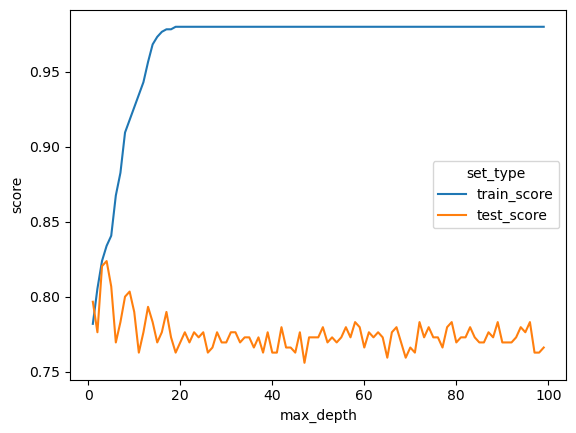

In [51]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

#### Analysis of the Graph:
- As the depth of the tree increases, the accuracy of classification on the training set also increases.
- However, this does not always lead to the discovery of general patterns in the data being studied.
- The test score is initially low (the model has not yet fully learned), peaks in the range of 3-5 depths (optimal state: the pattern learned from the training data is transferred to new data), but then, as the train score continues to increase, the test score starts to decrease (transition from underfitting to overfitting).

https://scikit-learn.org/stable/modules/cross_validation.html

Training on multiple subsets of data, or cross-validation, is a method in which the initial

In [129]:
from sklearn.model_selection import cross_val_score

In [130]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [131]:
cross_val_score(clf, X_train, y_train , cv=5)

array([0.76666667, 0.80833333, 0.78991597, 0.74789916, 0.80508475])

In [132]:
cross_val_score(clf, X_train, y_train , cv=5).mean()

0.7835799743626264

In [136]:
scores_data = pd.DataFrame()

In [137]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [138]:
scores_data.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781857
0,2,0.805369,0.776271,0.768553
0,3,0.823826,0.820339,0.788678
0,4,0.833893,0.823729,0.783580
0,5,0.840604,0.810169,0.796942


In [139]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'],
                          var_name='set_type', value_name='score')

In [140]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


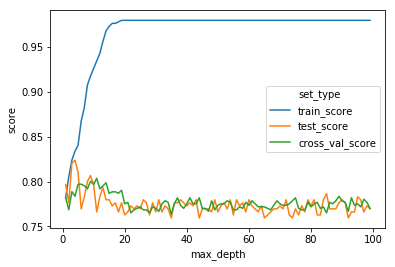

In [141]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_long)

The maximum accuracy is achieved at a greater depth of the tree than 3-5.

`cross_val_score` is more resistant to overfitting.

Let's find the tree with the maximum `cross_val_score`.

In [144]:
scores_data_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781857
199,2,cross_val_score,0.768553
200,3,cross_val_score,0.788678
201,4,cross_val_score,0.783580
202,5,cross_val_score,0.796942
203,6,cross_val_score,0.797083
204,7,cross_val_score,0.795317
205,8,cross_val_score,0.791885
206,9,cross_val_score,0.800274
207,10,cross_val_score,0.796885


5	cross_val_score	0.800303

In [146]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [148]:
cross_val_score(best_clf, X_test, y_test , cv=5).mean()

0.7864406779661017